In [4]:
# Useful starting lines
import numpy as np
from matplotlib import pyplot as plt    
from helpers import *
from methods import *
from process_data import *
from crossvalidation import *
from exploration import *

%load_ext autoreload
%autoreload 2

seed=20

# Exploratory Analysis
In this first part we explore our sample set, by first concatenating the training and test set to have a global view on our problem. Then we plot for each features the samples, and we will identify the eventual outliers.

In [58]:
from zipfile import ZipFile 
  
# # specifying the zip file name 
file_name = 'Data/test.csv.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Data/') 

y_train, tX_train, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')
featuresNames = np.genfromtxt('Data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

tX = np.r_[tX_train,tX_test]

## Variance Analysis
We may study the variance of each features. We can do the following assumption, a feature with a low variance may indicate that the feature is not rich enough to contribute to the model. Hence we may later consider removing this feature. Low variance features:
* 7/29 DER_deltar_tau_lep: 0.6097662799238968
* 10/29 DER_pt_ratio_lep_tau: 0.714209748113439
* 14/29 PRI_tau_eta: 1.472609701754366
* 17/29 PRI_lep_eta: 1.5983290031447774



In [17]:
featuresVariance(tX,featuresNames)

0/29 DER_mass_MMC: 164932.15269358983
1/29 DER_mass_transverse_met_lep: 1251.6459631676591
2/29 DER_mass_vis: 1646.9561696494948
3/29 DER_pt_h: 4021.073935227448
4/29 DER_deltaeta_jet_jet: 206837.49102108632
5/29 DER_mass_jet_jet: 433917.361126447
6/29 DER_prodeta_jet_jet: 205506.81886199833
7/29 DER_deltar_tau_lep: 0.6097662799241044
8/29 DER_pt_tot: 480.4202369693472
9/29 DER_sum_pt: 13476.84386789542
10/29 DER_pt_ratio_lep_tau: 0.714209748113269
11/29 DER_met_phi_centrality: 1.4261968302322243
12/29 DER_lep_eta_centrality: 206033.49600942497
13/29 PRI_tau_pt: 503.0607755655913
14/29 PRI_tau_eta: 1.4726097017543172
15/29 PRI_tau_phi: 3.2981580116183995
16/29 PRI_lep_pt: 490.28308212751847
17/29 PRI_lep_eta: 1.5983290031449755
18/29 PRI_lep_phi: 3.2945833589692777
19/29 PRI_met: 1055.9973633202503
20/29 PRI_met_phi: 3.2858926299428672
21/29 PRI_met_sumet: 16082.471823700715
22/29 PRI_jet_num: 0.9580355939810913
23/29 PRI_jet_leading_pt: 284192.4181846355
24/29 PRI_jet_leading_eta: 239

0

## Distribution Analysis
*Be aware of the column number!*
Now we can study the distribution of each feature given the label. If the distributions given two different labels are close and similar enoguh, it means that the feature may not be contributing enough to the classification problem. From the plots we may consider the following low separation features:
* 8/29 DER_pt_tot
* 16/29 PRI_lep_pt
* 26/29 PRI_jet_subleading_pt

CLASSE 0
1: 25492
-1: 74421
(73790,)


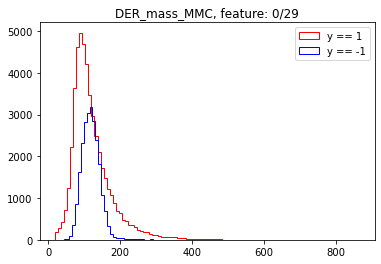

(99913,)


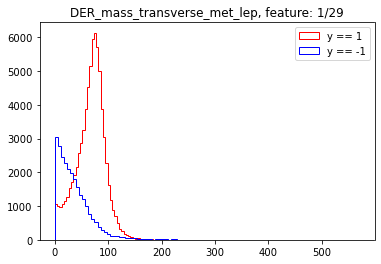

(99913,)


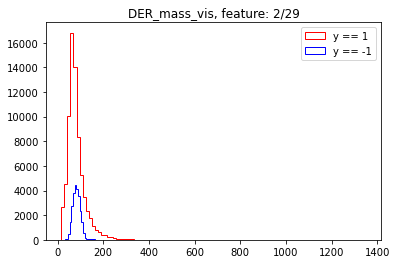

(99913,)


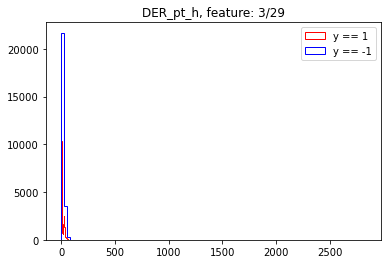

(99913,)


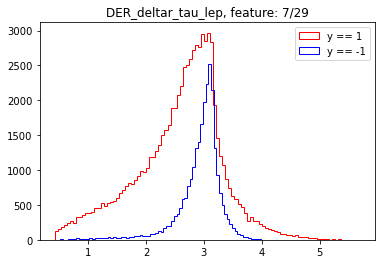

(99913,)


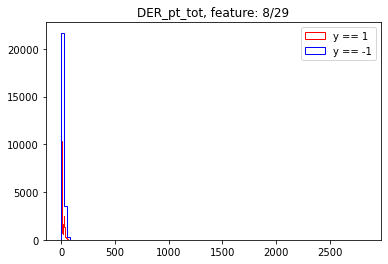

(99913,)


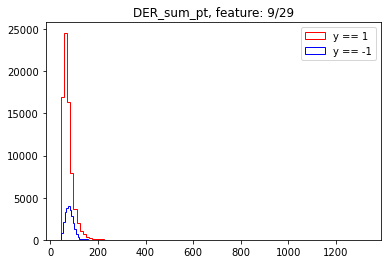

(99913,)


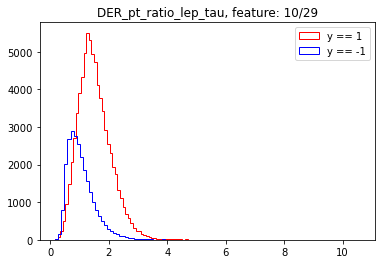

(99913,)


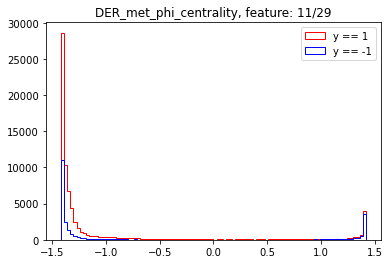

(99913,)


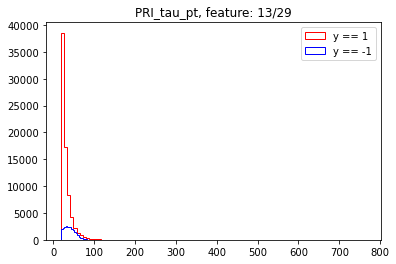

(99913,)


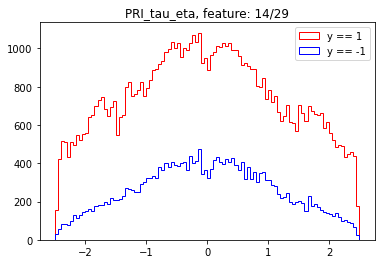

(99913,)


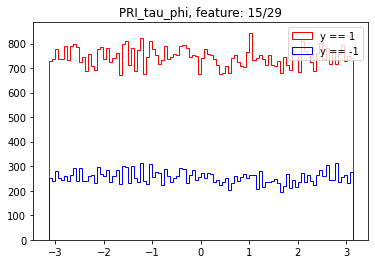

(99913,)


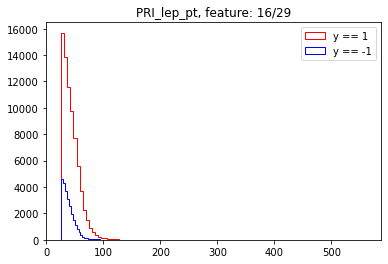

(99913,)


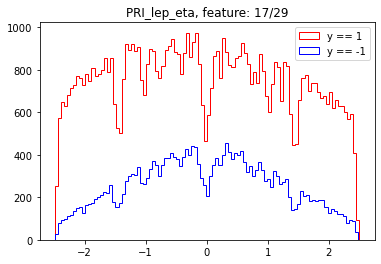

(99913,)


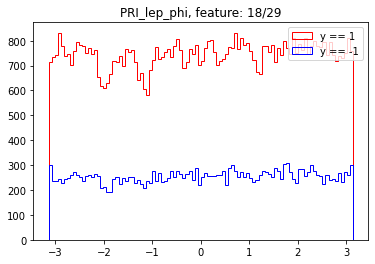

(99913,)


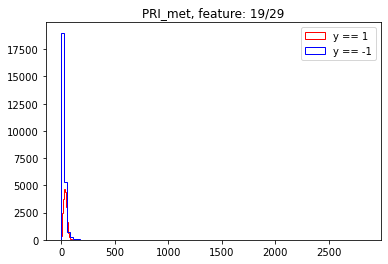

(99913,)


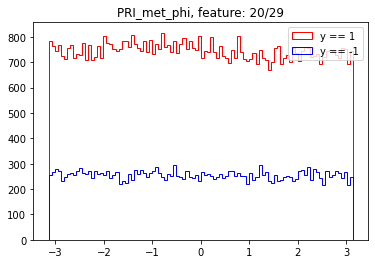

(99913,)


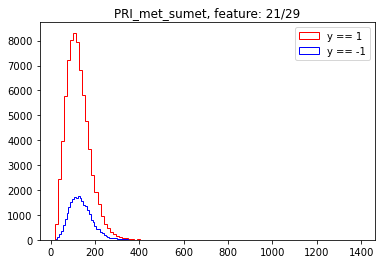

(99913,)


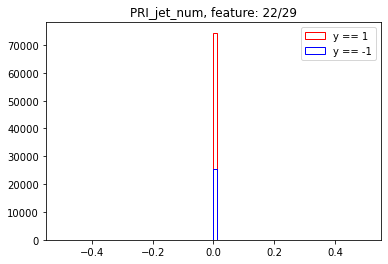

(99913,)


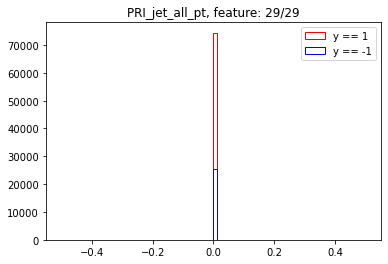

-------------------------------------------
-------------------------------------------
CLASSE 1
1: 27710
-1: 49834
(69982,)


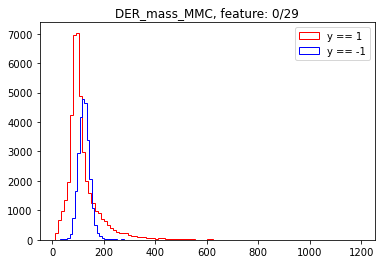

(77544,)


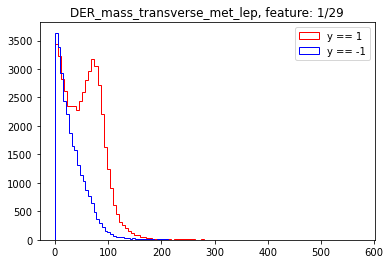

(77544,)


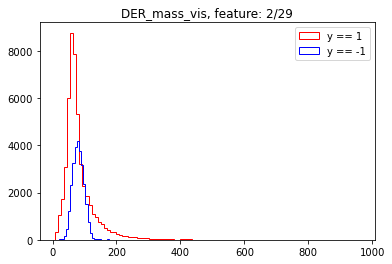

(77544,)


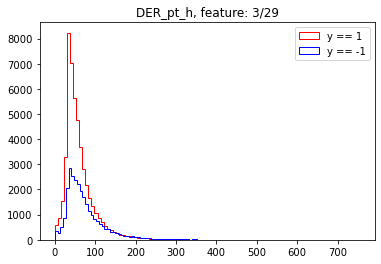

(77544,)


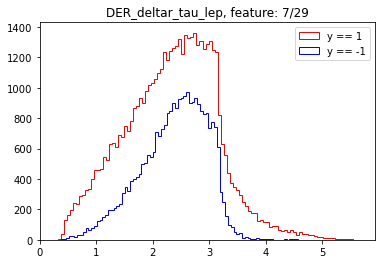

(77544,)


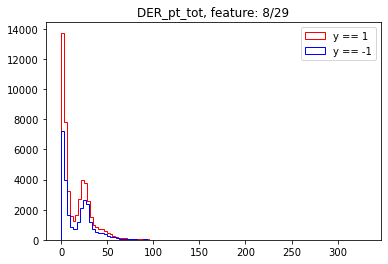

(77544,)


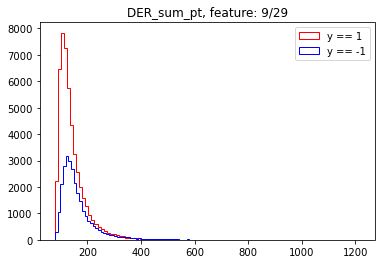

(77544,)


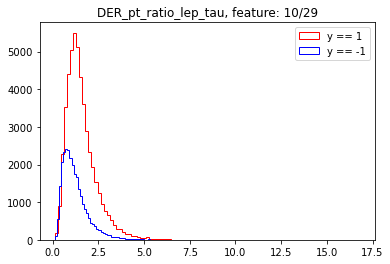

(77544,)


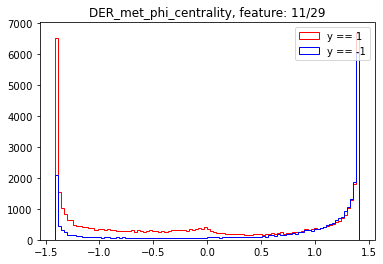

(77544,)


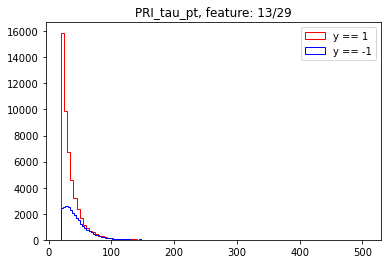

(77544,)


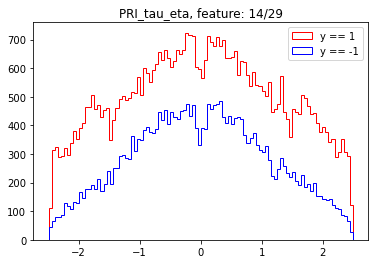

(77544,)


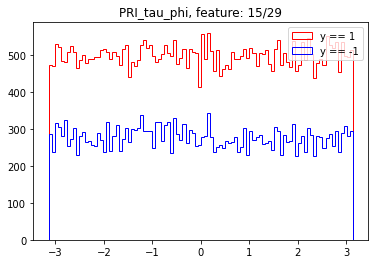

(77544,)


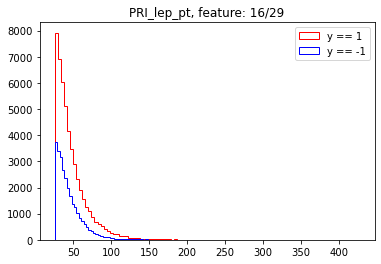

(77544,)


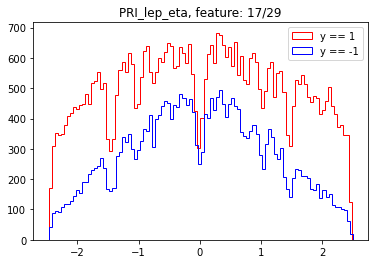

(77544,)


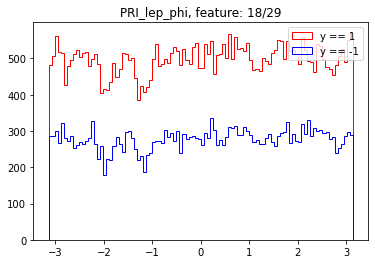

(77544,)


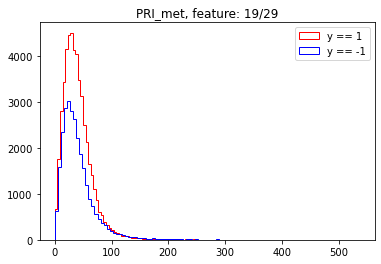

(77544,)


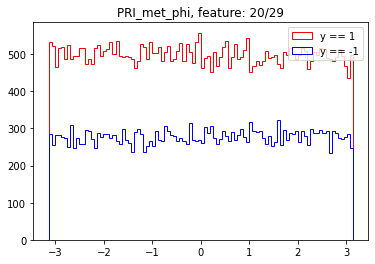

(77544,)


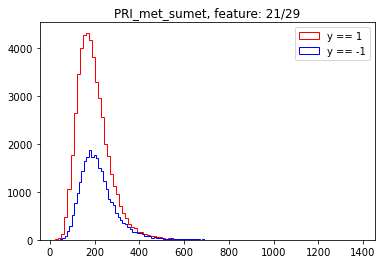

(77544,)


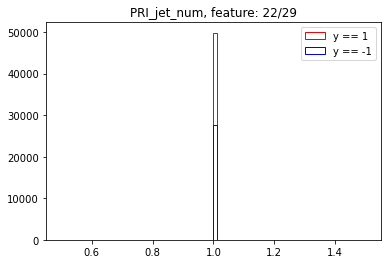

(77544,)


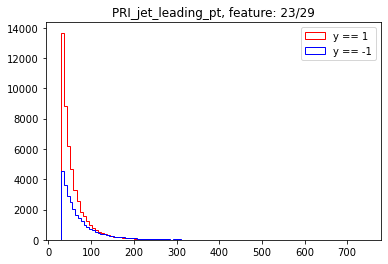

(77544,)


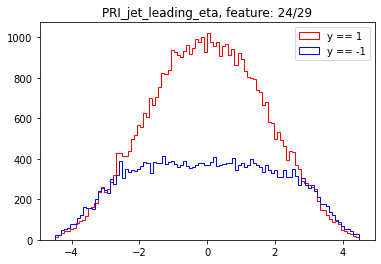

(77544,)


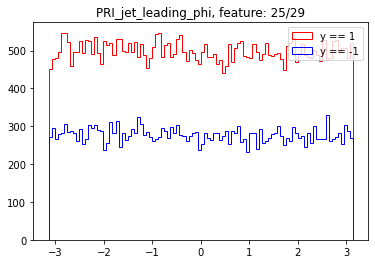

(77544,)


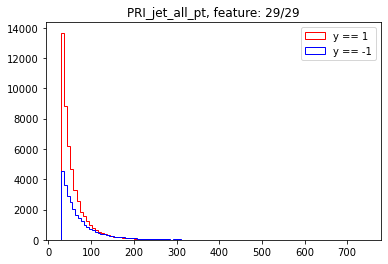

-------------------------------------------
-------------------------------------------
CLASSE 2
1: 25734
-1: 24645
(47427,)


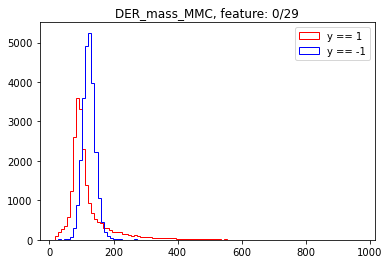

(50379,)


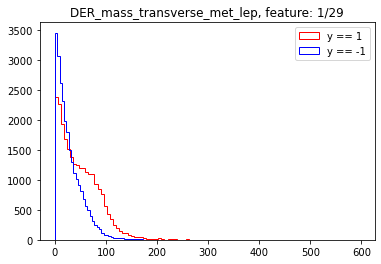

(50379,)


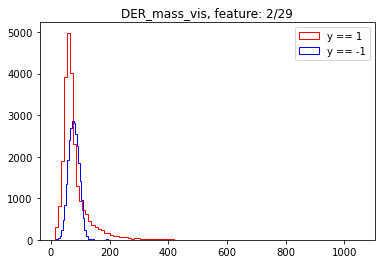

(50379,)


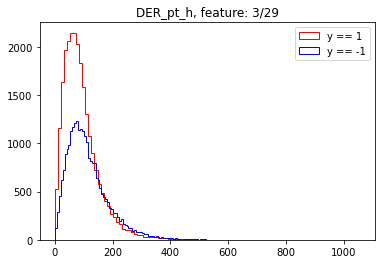

(50379,)


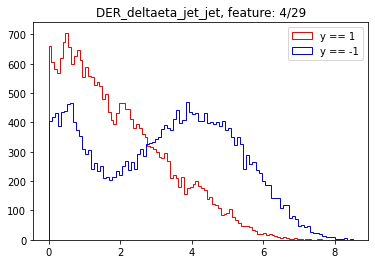

(50379,)


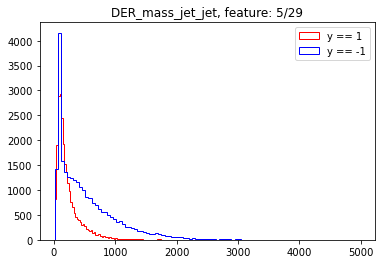

(50379,)


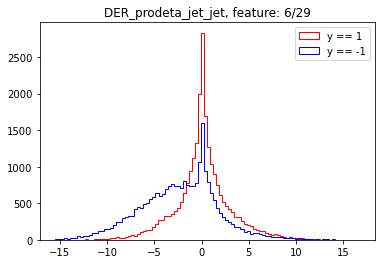

(50379,)


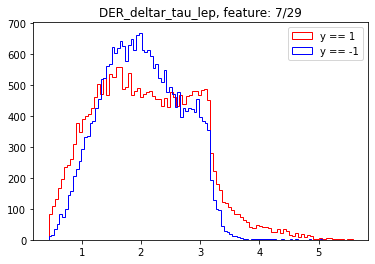

(50379,)


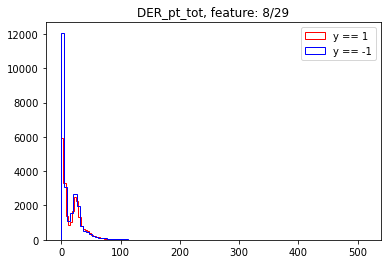

(50379,)


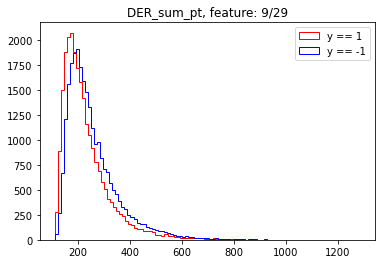

(50379,)


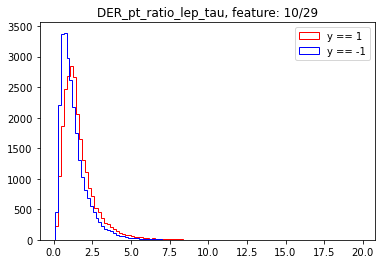

(50379,)


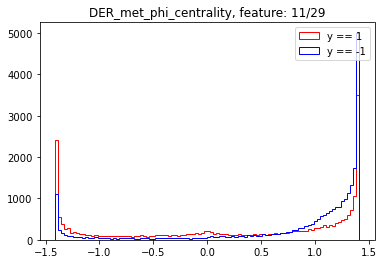

(50379,)


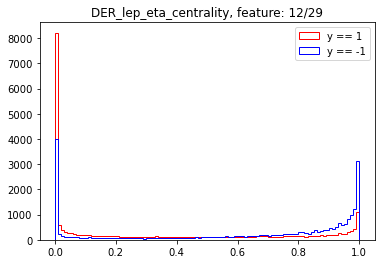

(50379,)


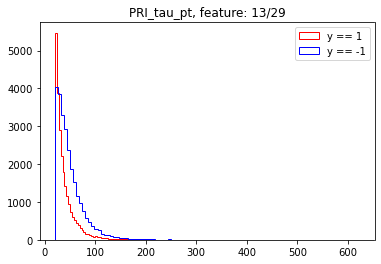

(50379,)


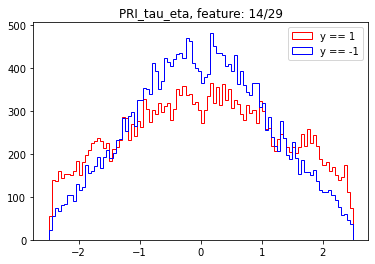

(50379,)


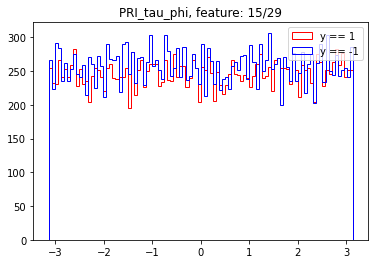

(50379,)


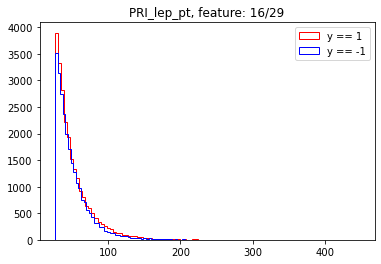

(50379,)


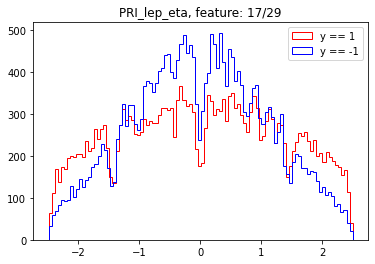

(50379,)


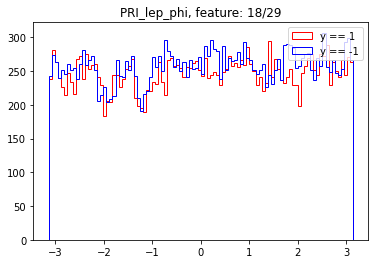

(50379,)


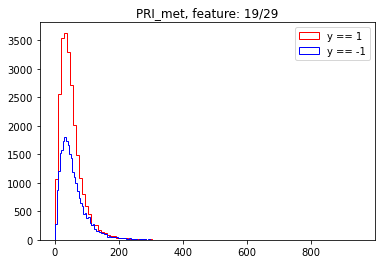

(50379,)


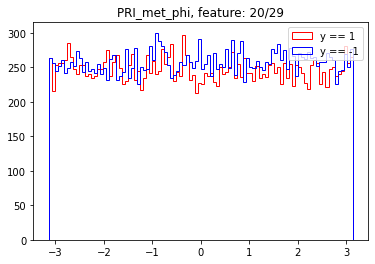

(50379,)


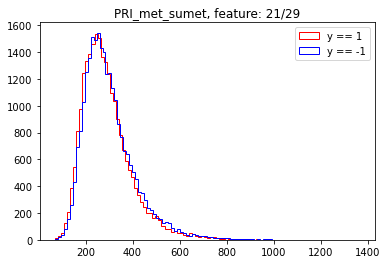

(50379,)


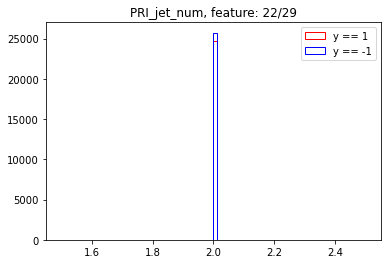

(50379,)


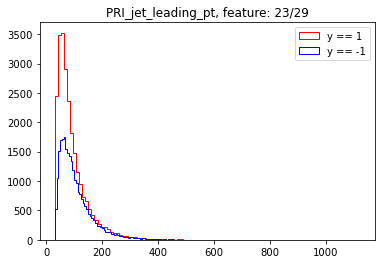

(50379,)


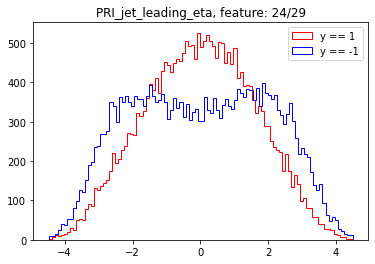

(50379,)


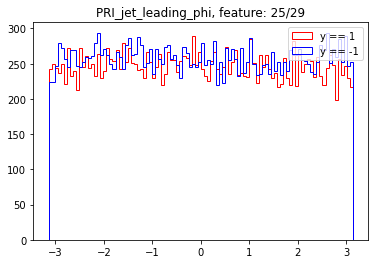

(50379,)


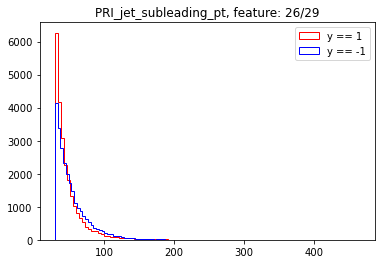

(50379,)


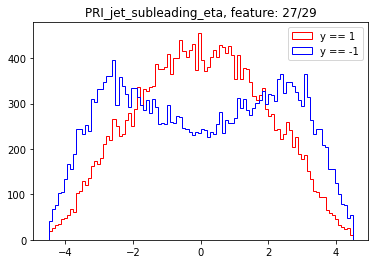

(50379,)


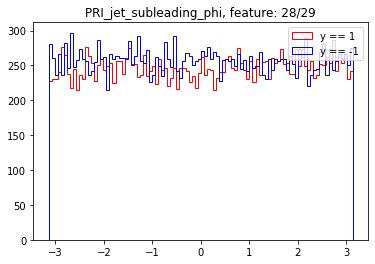

(50379,)


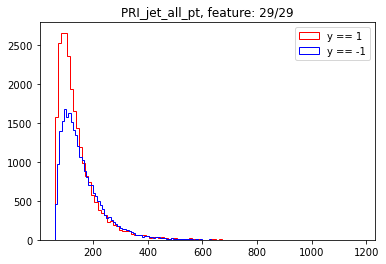

-------------------------------------------
-------------------------------------------
CLASSE 3
1: 6731
-1: 15433
(20687,)


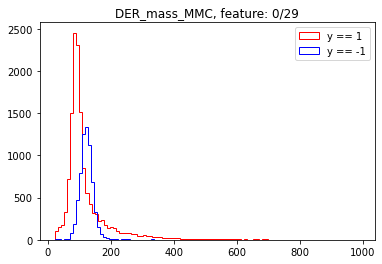

(22164,)


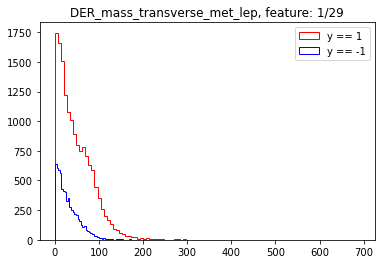

(22164,)


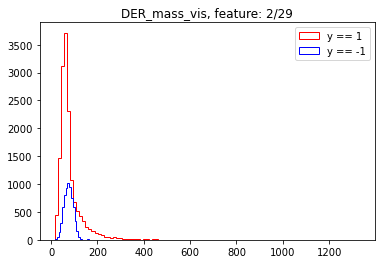

(22164,)


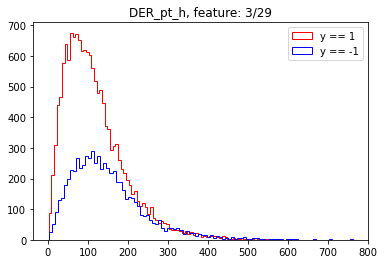

(22164,)


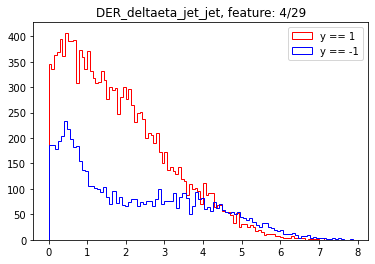

(22164,)


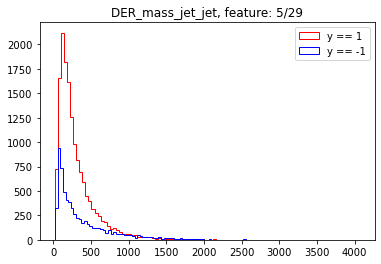

(22164,)


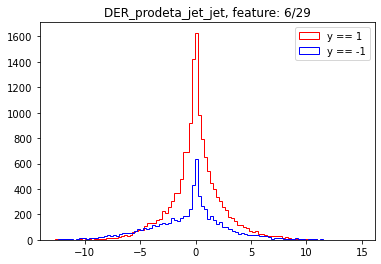

(22164,)


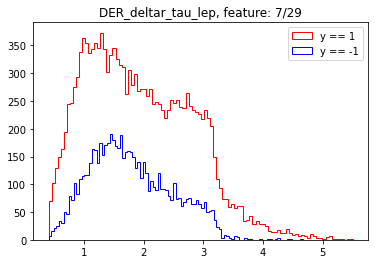

(22164,)


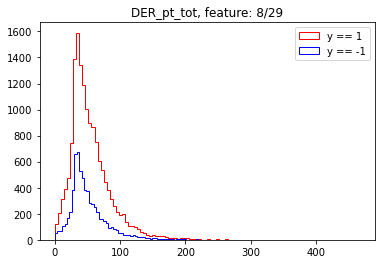

(22164,)


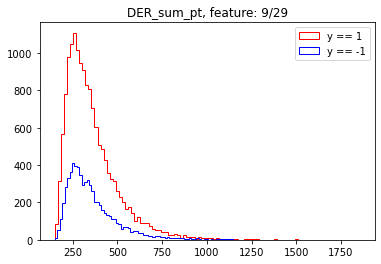

(22164,)


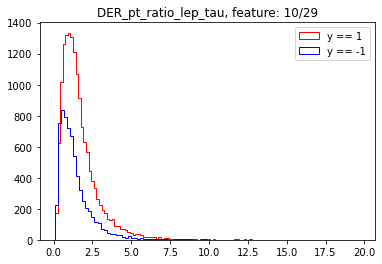

(22164,)


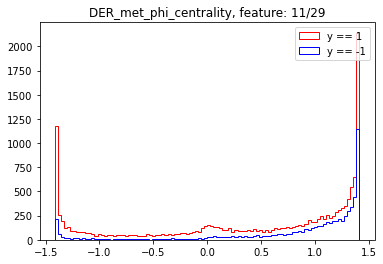

(22164,)


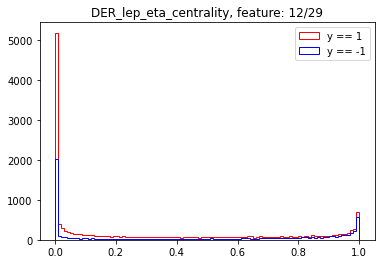

(22164,)


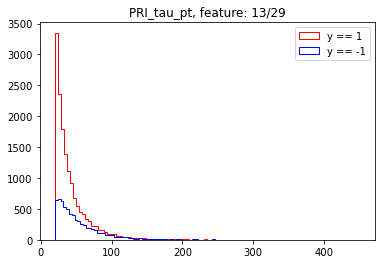

(22164,)


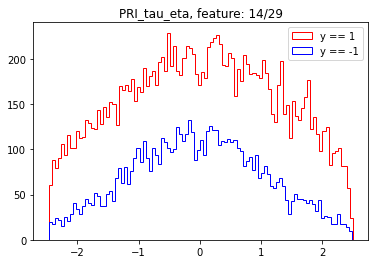

(22164,)


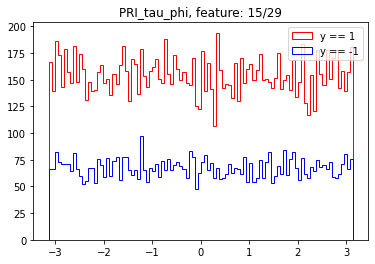

(22164,)


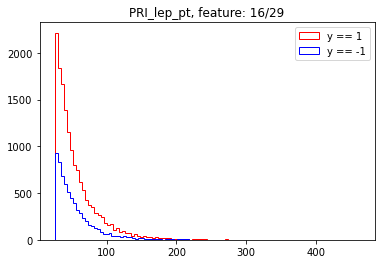

(22164,)


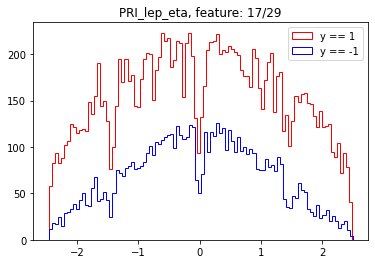

(22164,)


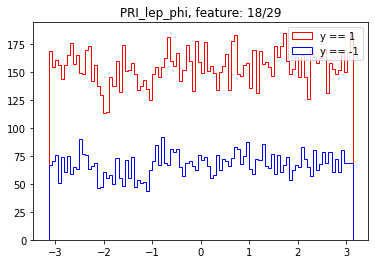

(22164,)


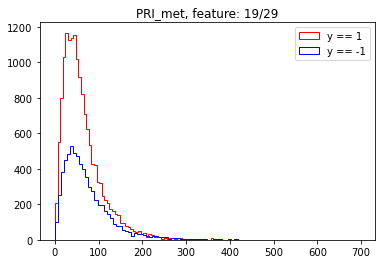

(22164,)


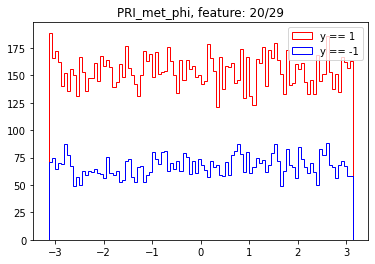

(22164,)


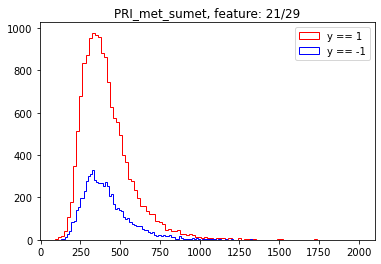

(22164,)


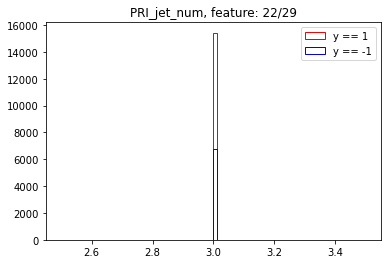

(22164,)


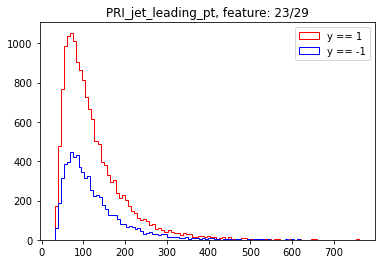

(22164,)


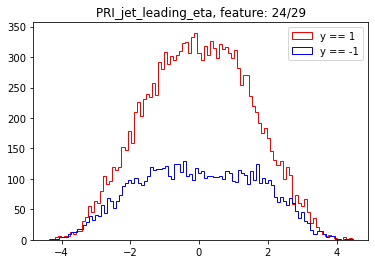

(22164,)


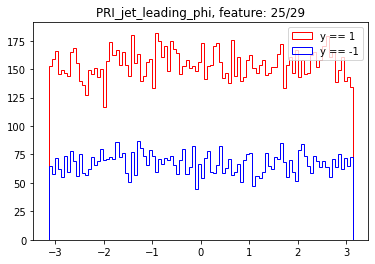

(22164,)


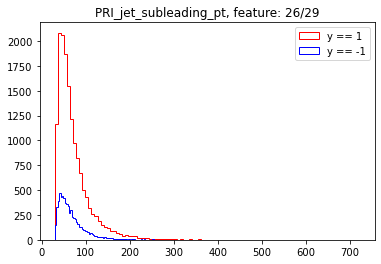

(22164,)


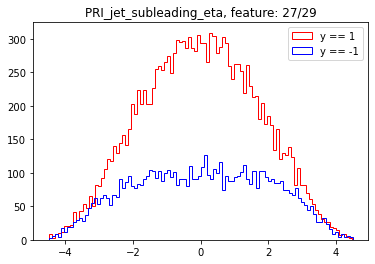

(22164,)


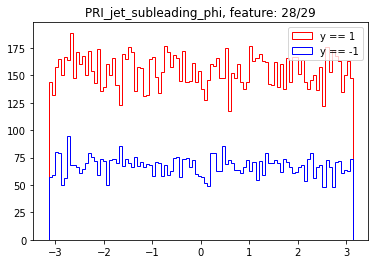

(22164,)


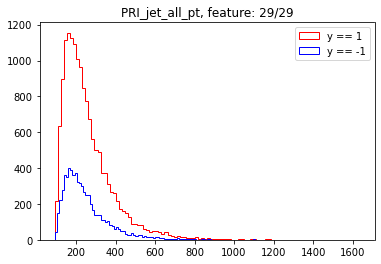

-------------------------------------------
-------------------------------------------


In [56]:
msk_jets_train = get_jet_masks(tX_train)
for idx in range(len(msk_jets_train)):
        
        print('CLASSE',idx)
        print('1:', list(y_train[msk_jets_train[idx]]).count(1))
        print('-1:', list(y_train[msk_jets_train[idx]]).count(-1))
        x = tX_train[msk_jets_train[idx]]
        y = y_train[msk_jets_train[idx]]
        distributionsPlot(y,x,featuresNames)

        print('-------------------------------------------')
        print('-------------------------------------------')

(211886,)


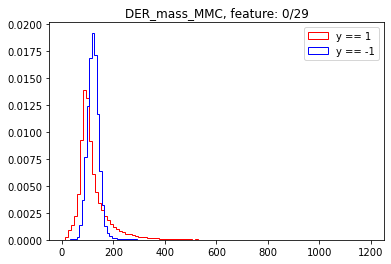

(250000,)


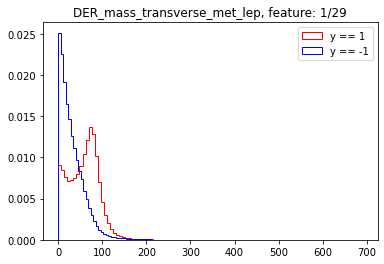

(250000,)


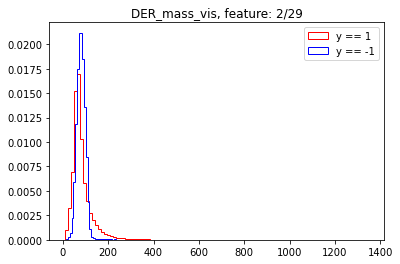

(250000,)


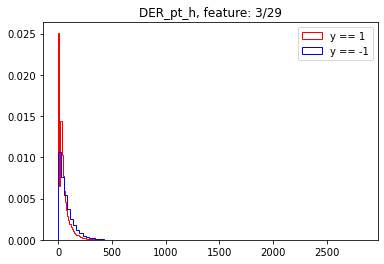

(72543,)


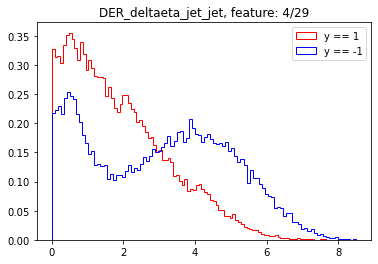

(72543,)


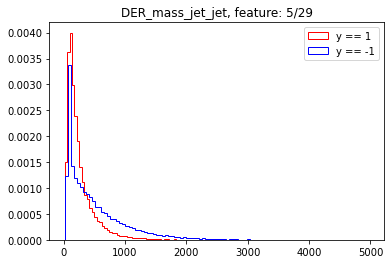

(72543,)


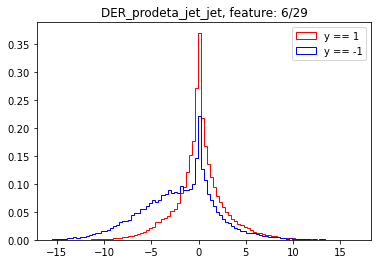

(250000,)


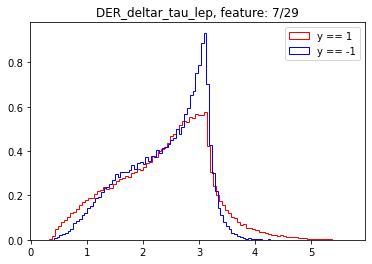

(250000,)


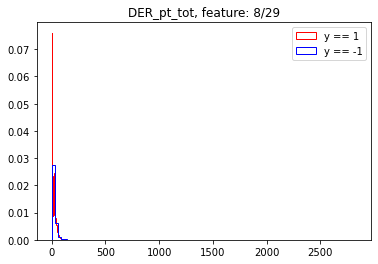

(250000,)


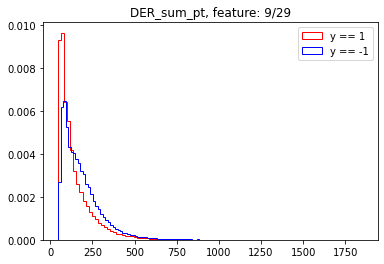

(250000,)


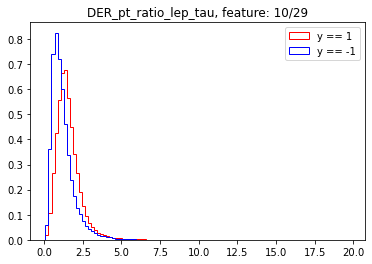

(250000,)


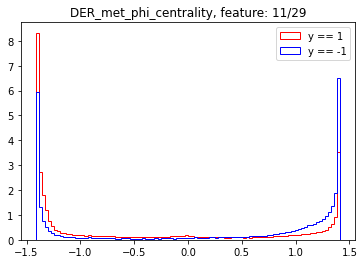

(72543,)


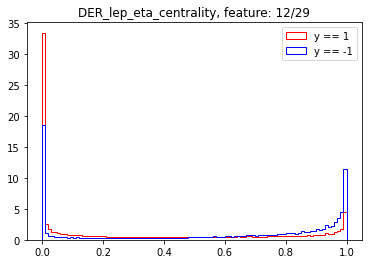

(250000,)


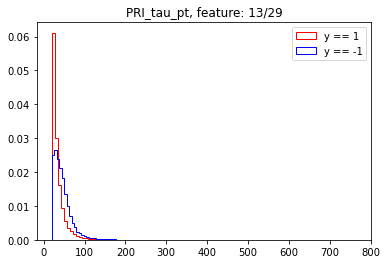

(250000,)


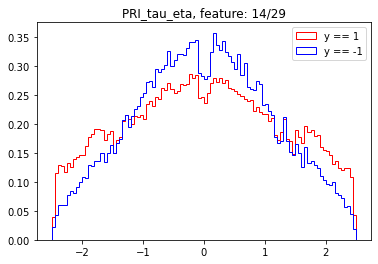

(250000,)


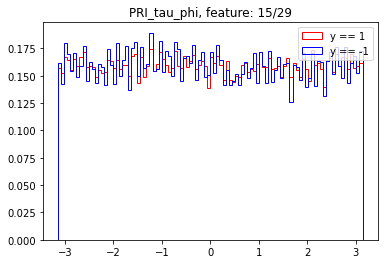

(250000,)


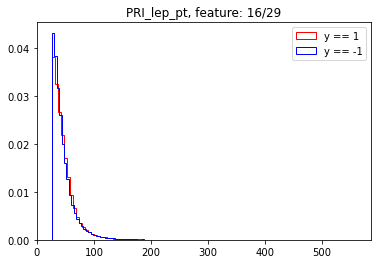

(250000,)


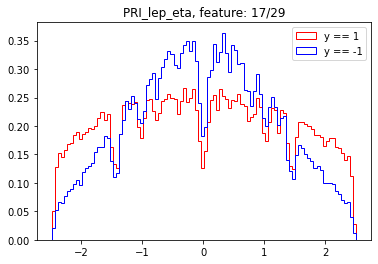

(250000,)


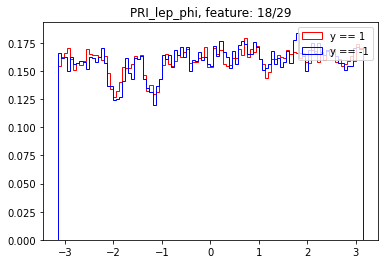

(250000,)


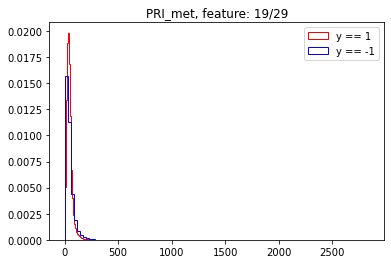

(250000,)


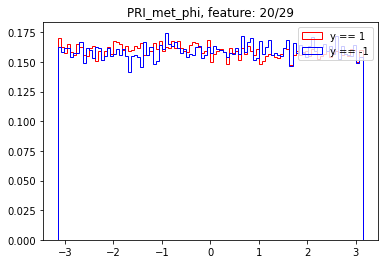

(250000,)


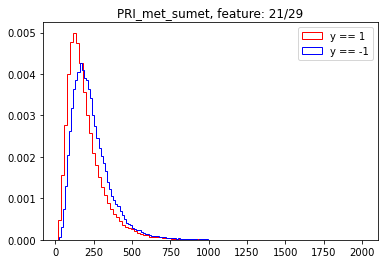

(250000,)


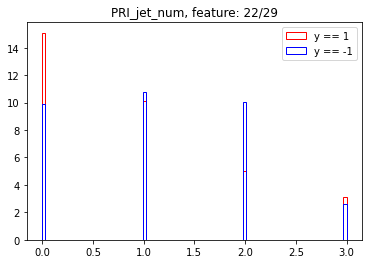

(150087,)


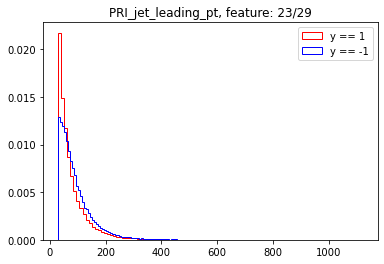

(150087,)


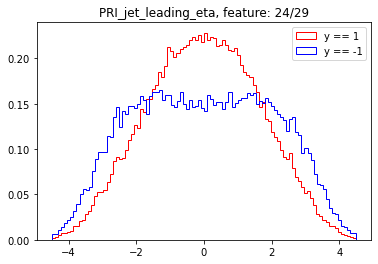

(150087,)


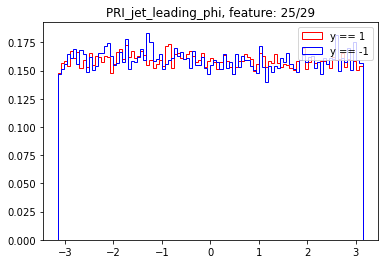

(72543,)


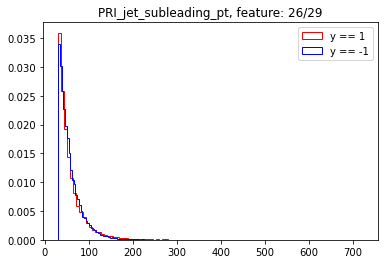

(72543,)


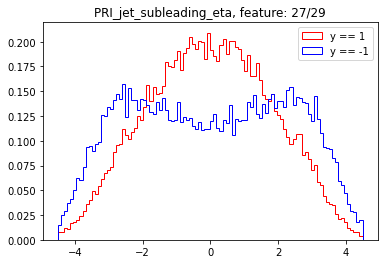

(72543,)


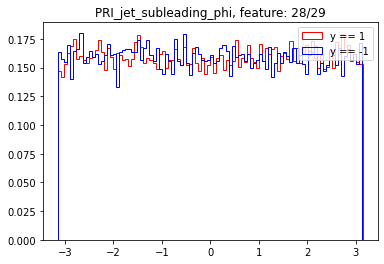

(250000,)


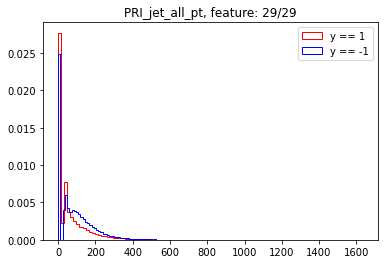

0

In [62]:
distributionsPlot(y_train, tX_train,featuresNames)

## Outlier Analysis

In [ ]:
featuresPlot(tX,featuresNames)